# Assess DIC and TA of samples

This NoteBook shows examples of a workflow that determines the DIC and TA content of samples analysed on a VINDTA 3C (at UEA), and assesses the quality of measurements based on results for the Certified Reference Materials (CRMs) run on each analysis day. 

For questions, contact Elise S. Droste (e.droste@uea.ac.uk)

***
# Introduction

In this NoteBook, the quality is checked of the calculated dissolved inorganic carbon (DIC) and total alkalinity (TA) content of the samples. 

Here, quality is checked for the samples only. The Certified Reference Materials (CRMs) have been quality checked in a separate NoteBook (`DIC_CRMs_QC.ipynb` and `TA_CRMs_QC.ipynb`). 

See also NoteBook `DICTA_fileprep.ipynb`, which includes the merging of the DIC/TA raw data with auxiliary datasets. 


***
# Samples & Analysis

Include any notes about the samples that will help interpretation of the results.

***
# References



<font color=blue> insert refs </font>

***
# Packages

In [1]:
import numpy as np
import pandas as pd
import warnings
import datetime
import matplotlib.pyplot as plt
from dateutil.parser import parse
from IPython.core.interactiveshell import InteractiveShell 
from pathlib import Path

warnings.filterwarnings('ignore') # suppresses warning messages from packages
InteractiveShell.ast_node_interactivity = "all" # allows you to see multiple outputs from a single cell

In [2]:
# To see plotly figures in this notebook: 
import plotly.io as pio
pio.renderers.default = "iframe_connected"# 'iframe' # or 'colab' or 'iframe' or 'iframe_connected' or 'sphinx_gallery'

# import plotly.express as px
import plotly.graph_objects as go

***
# Modules

I'm going to import two modules I created that were used for the DIC and TA determination (see `SD035_DIC_CRMs_QC.ipynb` and `SD035_TA_CRMs_QC.ipynb`), which include plotting functions just to check the initial quality of the sample data. 

`qc_samples_dicta` is a modules that uses Classes with functions for the total alkalinity data processing. It ensures consistent processing and formatting of the data. Import here. Classes are created after the data has been imported. They also include functions that quickly plot the results of the samples according to vertical profiles or time series to do initial quality checks. 

In [4]:
from UEA_VINDTA_pkg.qc_dicta_samples import QCSamples


Hello! I hope you've already calculated DIC and/or TA and that you've kept according to the conventions for these scripts.
If you're unsure, check the description of this script. 


In [5]:
from UEA_VINDTA_pkg import column_names

***
# Import Data

In [7]:
prelim_datadir = Path("../output_data/DICTA_calculated/") # directory path
prelim_datafile = "dicta_prelim_20250109.csv" # datafile

df_vindta = pd.read_csv(prelim_datadir / prelim_datafile)

***
# Merge and sort datasets

If you've been processing data from multiple VINDTAs, consider merging them here. 

Before merging the data, indicate which runs were done on which VINDTA. 

In [8]:
df_vindta["vindta"] = "Lucy"

In [9]:
# # Merge, keep all info
# df = pd.concat([df_vindta, df_other_vindta],axis=0,join="outer",ignore_index=True)

# Run the following if not merging any dataframes
df = df_vindta.copy()


Remove the CRMs from the datafile, we no longer need them

In [10]:
# Remove the CRMs
df = df[df["Station"]!=8888]

In [11]:
# Sort dataframe according to station, cast, and depth
df = df.sort_values(["Station", "Cast", "Depth (m)"], ascending = (True, True, True)).reset_index(drop = True)

Change "sampling_date" from object to datetime type (for some reason, the type of this column changed between notebooks... )

In [12]:
df["sampling_date"] = pd.to_datetime(df["sampling_date"])

***
Creat a Class

Create a Class

In [13]:
vindta_qc = QCSamples(df)

sampling_date found in the columns of the DataFrame. Make sure it's correctly populated, i.e. not empty.


***
# DIC

## Visualisation of data from CTD vertical profiles

We're going to make a figure with subplots for each CTD profile. Decide on the number of columns and rows for the subplots. 

In [14]:
column_names.numberofcols = 4
column_names.fig_height = 3000

In [15]:
column_names.coloured_var = column_names.diccellnum # determine whether you want the marker colors to vary according to DIC cell (diccellnum) or on which vindta they were run (vindta)
column_names.profile_stations_list = [0, 1111] # select which stations you want to appear in your figure
vindta_qc.qc_conc_profiles(to_plot = column_names.dic_sample_umol_per_kg)


Figure saved as self.qc_conc_profiles_fig


In [16]:
column_names.coloured_var = "vindta" # determine whether you want the marker colors to vary according to DIC cell (diccellnum) or on which vindta they were run (vindta)
column_names.profile_stations_list = [0, 1111] # select which stations you want to appear in your figure
vindta_qc.qc_conc_profiles(to_plot = column_names.dic_sample_umol_per_kg)


Figure saved as self.qc_conc_profiles_fig


## Visualisation of data from Underway samples

In [17]:
column_names.coloured_var = column_names.diccellnum # determine whether you want the marker colors to vary according to DIC cell (diccellnum) or on which vindta they were run (vindta)
column_names.uw_stations_list = [2222, 3333] # select which stations you want to appear in your figure
vindta_qc.qc_conc_timeseries(to_plot = column_names.dic_sample_umol_per_kg)

Figure saved as self.qc_conc_timeseries_fig


***
# TA

## Visualisation of data from CTD vertical profiles

In [18]:
column_names.coloured_var = column_names.diccellnum # determine whether you want the marker colors to vary according to DIC cell (diccellnum) or on which vindta they were run (vindta)
column_names.profile_stations_list = [0, 1111] # select which stations you want to appear in your figure
vindta_qc.qc_conc_profiles(to_plot = column_names.alkalinity_umolkg)


Figure saved as self.qc_conc_profiles_fig


In [19]:
column_names.coloured_var = "vindta" # determine whether you want the marker colors to vary according to DIC cell (diccellnum) or on which vindta they were run (vindta)
column_names.profile_stations_list = [0, 1111] # select which stations you want to appear in your figure
vindta_qc.qc_conc_profiles(to_plot = column_names.alkalinity_umolkg)


Figure saved as self.qc_conc_profiles_fig


***
## Visualisation of data from Underway samples

In [20]:
column_names.coloured_var = column_names.diccellnum # determine whether you want the marker colors to vary according to DIC cell (diccellnum) or on which vindta they were run (vindta)
column_names.uw_stations_list = [2222, 3333] # select which stations you want to appear in your figure
vindta_qc.qc_conc_timeseries(to_plot = column_names.alkalinity_umolkg)

Figure saved as self.qc_conc_timeseries_fig


In [21]:
df[["Sample Name", "Salinity", "vindta", "analysis_datetime"]].loc[df["alkalinity_umolkg"]< 100]

,Sample Name,Salinity,vindta,analysis_datetime
18,0000_019_21_6_1_1,32.8850,Lucy,2024-02-01 00:24:07
67,0000_036_4_300_3_1,34.5270,Lucy,2024-02-02 11:20:18
72,0000_039_20_5_1_1,32.8491,Lucy,2024-02-03 04:04:16
217,0000_087_20_17_1_1,33.3027,Lucy,2024-02-11 12:59:06


***
# Flag samples

Flag the DIC and TA values of the samples. 

- 4: bad data point
- 2: good data point

## DIC

In [22]:
# First set all DIC flags to 2 (DIC flag is NaN until now)
df["DIC flag"] = 2

dic_flag_4 = ["0000_039_7_225_3_1", "0000_087_20_17_2_1", "0000_023_2_340_2_1", "0000_101_12_150_1_1", "1111_007_5_330_1_1"] # insert sample names

for i in dic_flag_4: 
    df["DIC flag"].loc[df["Sample Name"].str.contains(i)] = 4

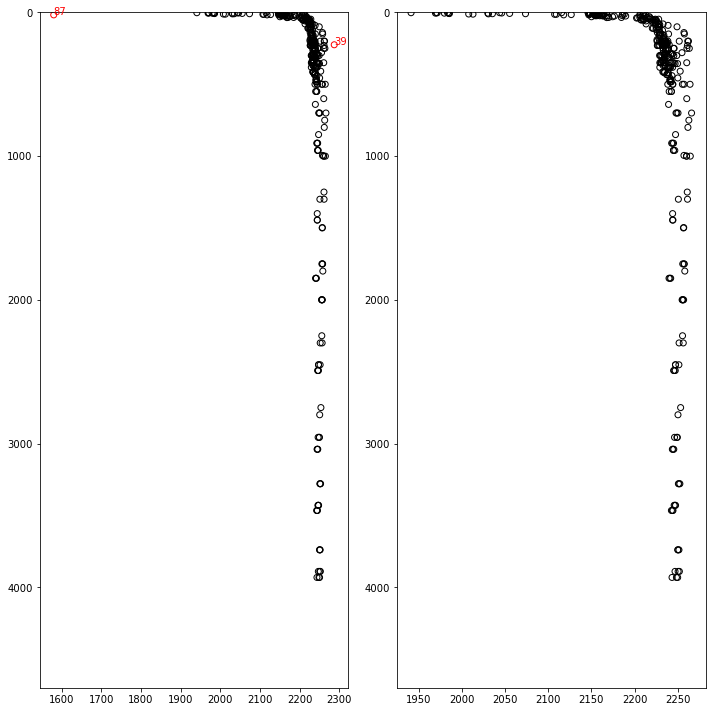

In [23]:
fig = plt.figure(figsize = (10, 10))
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

cond = (df["DIC flag"] != 4) & (df["Station"].isin([0000, 1111]))
ax0.scatter(df["dic_sample_umol_per_kg"].loc[cond], df["Depth (m)"].loc[cond], marker = "o", c = "None", ec = "k")

cond = (df["DIC flag"] == 4) & (df["Station"].isin([0000, 1111]))
ax0.scatter(df["dic_sample_umol_per_kg"].loc[cond], df["Depth (m)"].loc[cond], marker = "o", c = "None", ec = "r")

cond = (df["DIC flag"] == 4) & (df["Station"].isin([0000, 1111]))
for i in df.loc[cond].index:
    ax0.annotate(df["Cast"].loc[i], (df["dic_sample_umol_per_kg"].loc[i], df["Depth (m)"].loc[i]), c = "r")


cond = (df["DIC flag"] != 4) & (df["Station"].isin([0000, 1111]))
ax1.scatter(df["dic_sample_umol_per_kg"].loc[cond], df["Depth (m)"].loc[cond], marker = "o", c = "None", ec = "k")

ax0.set_ylim(4700, 0)
ax1.set_ylim(4700, 0)

fig.tight_layout();

## TA

In [24]:
# First set all TA flags to 2 (TA flag is NaN until now)
df["TA flag"] = 2

ta_flag_4 = ["0000_019_21_6_1_1", "0000_036_4_300_3_1", "0000_039_20_5_1_1", "0000_023_2_340_1_1", "0000_087_20_17_1_1", 
             "0000_093_7_1000_1_1", "2222_202402051659_1_7_1_1", "2222_20240130190009_32_7_1_1"] # insert sample names

for i in ta_flag_4: 
    df["TA flag"].loc[df["Sample Name"].str.contains(i)] = 4



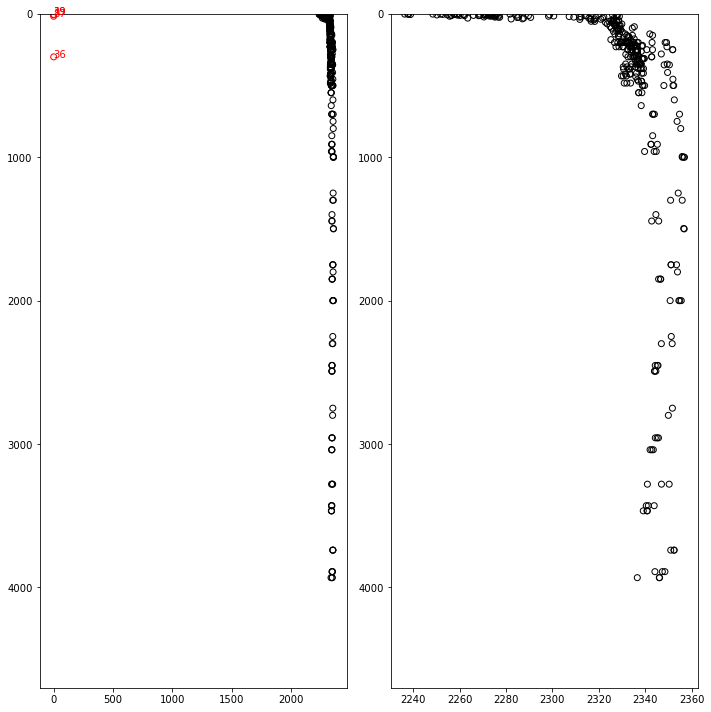

In [25]:
fig = plt.figure(figsize = (10, 10))
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

cond = (df["TA flag"] != 4) & (df["Station"].isin([0000, 1111]))
ax0.scatter(df["alkalinity_umolkg"].loc[cond], df["Depth (m)"].loc[cond], marker = "o", c = "None", ec = "k")

cond = (df["TA flag"] == 4) & (df["Station"].isin([0000, 1111]))
ax0.scatter(df["alkalinity_umolkg"].loc[cond], df["Depth (m)"].loc[cond], marker = "o", c = "None", ec = "r")

cond = (df["TA flag"] == 4) & (df["Station"].isin([0000, 1111]))
for i in df.loc[cond].index:
    ax0.annotate(df["Cast"].loc[i], (df["alkalinity_umolkg"].loc[i], df["Depth (m)"].loc[i]), c = "r")

cond = (df["TA flag"] != 4) & (df["Station"].isin([0000, 1111]))
ax1.scatter(df["alkalinity_umolkg"].loc[cond], df["Depth (m)"].loc[cond], marker = "o", c = "None", ec = "k")

ax0.set_ylim(4700, 0)
ax1.set_ylim(4700, 0)

fig.tight_layout();

***
# Further QC

Further assess the quality of the DIC and TA data by plotting the data against salinity, nutrient, and in situ temperature data. Flag where necessary. 

***
# Replicate samples

<font color=orange> Select replicate ssamples, groupby, mean and std, into dictionary, feed back into original df. 

<font color=orange>  Plot sequentially (analysis date), and assses. 

## Calculate replicate means

In [26]:
df_replicates = df.loc[df.duplicated(subset = ["Station", "Cast", "Niskin"], keep = False) == True].copy()
df_replicates["station_cast_niskin_depth"] = df_replicates["Station"].astype(int).astype(str) + "_" + df_replicates["Cast"].astype(int).astype(str) + "_" + df_replicates["Niskin"].astype(int).astype(str) + "_" + df_replicates["Depth (m)"].astype(int).astype(str)




Make sure faulty runs are not included in means: 

In [28]:
# Where DIC flag == 4, set DIC to NaN
df_replicates["dic_sample_umol_per_kg"].where(df_replicates["DIC flag"] != 4, np.float("NaN"), inplace = True)
df_replicates["dic_sample_umol_per_kg_driftcorr"].where(df_replicates["DIC flag"] != 4, np.float("NaN"), inplace = True)


# Where TA flag == 4, set TA to NaN
df_replicates["alkalinity_umolkg"].where(df_replicates["TA flag"] != 4, np.float("NaN"), inplace = True)


In [29]:
df_replicates_mean = df_replicates.groupby(by = ["Station", "Cast", "Niskin"]).mean().reset_index()
df_replicates_mean["station_cast_niskin_depth"] = df_replicates_mean["Station"].astype(int).astype(str) + "_" + df_replicates_mean["Cast"].astype(int).astype(str) + "_" + df_replicates_mean["Niskin"].astype(int).astype(str) + "_" + df_replicates_mean["Depth (m)"].astype(int).astype(str)

df_replicates_std = df_replicates.groupby(by = ["Station", "Cast", "Niskin"]).std().reset_index()
df_replicates_std["station_cast_niskin_depth"] = df_replicates_std["Station"].astype(int).astype(str) + "_" + df_replicates_std["Cast"].astype(int).astype(str) + "_" + df_replicates_std["Niskin"].astype(int).astype(str) + "_" + df_replicates_std["Depth (m)"].astype(int).astype(str)


## Assess the triplicates for CTD samples

In [30]:
import plotly.subplots

In [38]:
def assess_triplicates_ctd_dic():
    # fig =plotly.subplots.make_subplots(1)
    fig = go.Figure()
    
    fig.update_layout(title='Assess DIC triplicates for CTD samples', xaxis_title='Cast', yaxis_title='DIC')
    
    
    cond = (df_replicates_mean["DIC flag"] != 4) & (df_replicates_mean["Station"].isin([0000, 1111]))
    fig.add_trace(go.Scatter(x=df_replicates_mean["Cast"].loc[cond], y=df_replicates_mean["dic_sample_umol_per_kg"].loc[cond], 
                             mode='markers+text', 
                             text = df_replicates_mean["Depth (m)"].loc[cond], 
                             textposition = "bottom right", 
                             textfont = dict(size = 10), 
                             hovertext = df_replicates_mean["station_cast_niskin_depth"].loc[cond], 
                             marker=dict(color="green",size = 10), 
                             name='Mean'))
    
    cond = (df_replicates["DIC flag"] != 4) & (df_replicates["Station"].isin([0000, 1111]))
    fig.add_trace(go.Scatter(x=df_replicates["Cast"].loc[cond], y=df_replicates["dic_sample_umol_per_kg"].loc[cond], 
                             mode='markers+text', 
                             hovertext = df_replicates["station_cast_niskin_depth"].loc[cond], 
                             marker=dict(color='Blue'), 
                             name='Indiv'))
    
    
    cond = (df_replicates["DIC flag"] == 4) & (df_replicates["Station"].isin([0000, 1111]))
    fig.add_trace(go.Scatter(x=df_replicates["Cast"].loc[cond], y=df_replicates["dic_sample_umol_per_kg"].loc[cond], 
                             mode='markers+text', 
                             hovertext = df_replicates["station_cast_niskin_depth"].loc[cond], 
                             marker=dict(color='Red'), 
                             name='Indiv'))

    return fig

assess_triplicates_ctd_dic()
# fig.show()

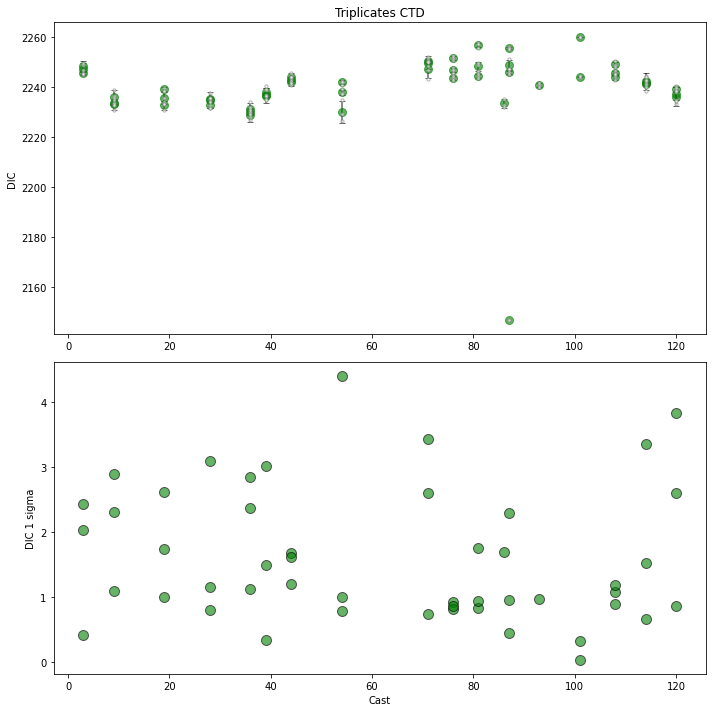

In [39]:
fig = plt.figure(figsize = (10, 10))
ax0 = fig.add_subplot(211)
ax1 = fig.add_subplot(212)

cond = (df_replicates_mean["DIC flag"] != 4) & (df_replicates_mean["Station"].isin([0000, 1111]))
ax0.errorbar(df_replicates_mean["Cast"].loc[cond], df_replicates_mean["dic_sample_umol_per_kg"].loc[cond], 
             yerr = df_replicates_std["dic_sample_umol_per_kg"].loc[cond],  
             fmt = "o", color = "green", ecolor = "k", alpha = 0.6, capsize = 3, ms = 8, zorder = 0)

cond = (df_replicates["DIC flag"] != 4) & (df_replicates["Station"].isin([0000, 1111]))
ax0.scatter(df_replicates["Cast"].loc[cond], df_replicates["dic_sample_umol_per_kg"].loc[cond], marker = "o", s = 10, c = "w", alpha = 0.6, edgecolor = "grey", zorder = 3)


cond = (df_replicates_std["DIC flag"] != 4) & (df_replicates_std["Station"].isin([0000, 1111]))
ax1.scatter(df_replicates_std["Cast"].loc[cond], df_replicates_std["dic_sample_umol_per_kg"].loc[cond], marker = "o", s = 100, c = "g", alpha = 0.6, edgecolor = "k")

ax0.set_ylabel("DIC")
ax1.set_ylabel("DIC 1 sigma")
ax1.set_xlabel("Cast")

ax0.set_title("Triplicates CTD")
fig.tight_layout(); 



In [40]:
cond = (df_replicates_std["DIC flag"] != 4) & (df_replicates_std["Station"].isin([0000, 1111]))
df_replicates_std["dic_sample_umol_per_kg"].loc[cond].describe()

count    49.000000
mean      1.609301
std       1.022204
min       0.032180
25%       0.864703
50%       1.175871
75%       2.367461
max       4.394888
Name: dic_sample_umol_per_kg, dtype: float64

In [41]:
def assess_triplicates_ctd_ta():
    fig = go.Figure()
    
    fig.update_layout(title='Assess TA triplicates for CTD samples', xaxis_title='Cast', yaxis_title='TA')
    
    cond = (df_replicates_mean["TA flag"] != 4) & (df_replicates_mean["Station"].isin([0000, 1111]))
    fig.add_trace(go.Scatter(x=df_replicates_mean["Cast"].loc[cond], y=df_replicates_mean["alkalinity_umolkg"].loc[cond], 
                             mode='markers+text', 
                             text = df_replicates_mean["Depth (m)"].loc[cond], 
                             textposition = "bottom right", 
                             textfont = dict(size = 10), 
                             hovertext = df_replicates_mean["station_cast_niskin_depth"].loc[cond], 
                             marker=dict(color="green",size = 10), 
                             name='Mean'))
    
    cond = (df_replicates["TA flag"] != 4) & (df_replicates["Station"].isin([0000, 1111]))
    fig.add_trace(go.Scatter(x=df_replicates["Cast"].loc[cond], y=df_replicates["alkalinity_umolkg"].loc[cond], 
                             mode='markers+text', 
                             hovertext = df_replicates["station_cast_niskin_depth"].loc[cond], 
                             marker=dict(color='Blue'), 
                             name='Indiv'))
    
    
    cond = (df_replicates["TA flag"] == 4) & (df_replicates["Station"].isin([0000, 1111]))
    fig.add_trace(go.Scatter(x=df_replicates["Cast"].loc[cond], y=df_replicates["alkalinity_umolkg"].loc[cond], 
                             mode='markers+text', 
                             hovertext = df_replicates["station_cast_niskin_depth"].loc[cond], 
                             marker=dict(color='Red'), 
                             name='Indiv'))
    return fig

assess_triplicates_ctd_ta()

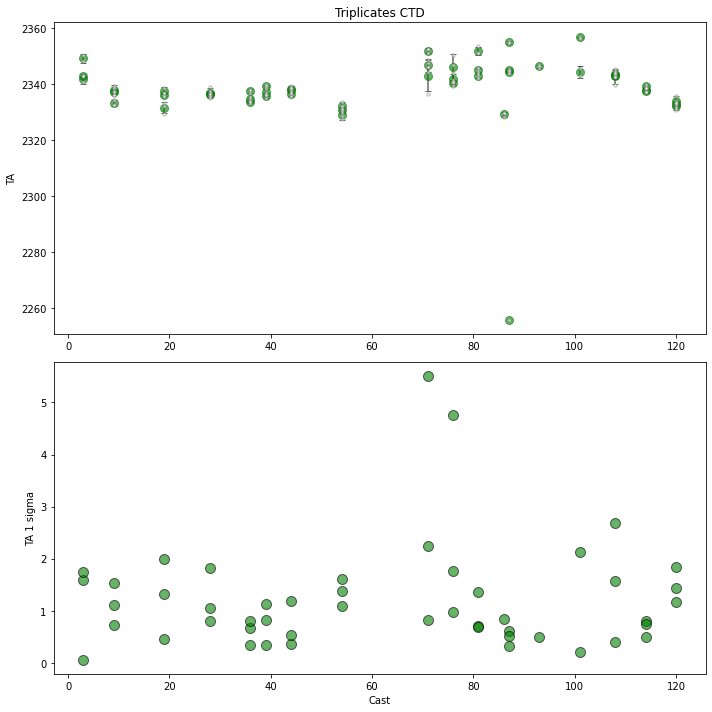

In [42]:
fig = plt.figure(figsize = (10, 10))
ax0 = fig.add_subplot(211)
ax1 = fig.add_subplot(212)

cond = (df_replicates_mean["TA flag"] != 4) & (df_replicates_mean["Station"].isin([0000, 1111]))
ax0.errorbar(df_replicates_mean["Cast"].loc[cond], df_replicates_mean["alkalinity_umolkg"].loc[cond], 
             yerr = df_replicates_std["alkalinity_umolkg"].loc[cond],  
             fmt = "o", color = "green", ecolor = "k", alpha = 0.6, capsize = 3, ms = 8, zorder = 0)

cond = (df_replicates["TA flag"] != 4) & (df_replicates["Station"].isin([0000, 1111]))
ax0.scatter(df_replicates["Cast"].loc[cond], df_replicates["alkalinity_umolkg"].loc[cond], marker = "o", s = 10, c = "w", alpha = 0.6, edgecolor = "grey", zorder = 3)


cond = (df_replicates_std["TA flag"] != 4) & (df_replicates_std["Station"].isin([0000, 1111]))
ax1.scatter(df_replicates_std["Cast"].loc[cond], df_replicates_std["alkalinity_umolkg"].loc[cond], marker = "o", s = 100, c = "g", alpha = 0.6, edgecolor = "k")

ax0.set_ylabel("TA")
ax1.set_ylabel("TA 1 sigma")
ax1.set_xlabel("Cast")

ax0.set_title("Triplicates CTD")
fig.tight_layout(); 

In [43]:
cond = (df_replicates_std["TA flag"] != 4) & (df_replicates_std["Station"].isin([0000, 1111]))
df_replicates_std["alkalinity_umolkg"].loc[cond].describe()

count    49.000000
mean      1.215852
std       1.008729
min       0.060466
25%       0.617887
50%       0.981643
75%       1.578618
max       5.504490
Name: alkalinity_umolkg, dtype: float64

## Assess duplicates for UW samples

In [44]:
def assess_triplicates_uw_dic():
    fig = go.Figure()
    
    cond = (df_replicates_mean["DIC flag"] != 4) & (df_replicates_mean["Station"].isin([2222, 3333]))
    fig.add_trace(go.Scatter(x=df_replicates_mean["Cast"].loc[cond], y=df_replicates_mean["dic_sample_umol_per_kg"].loc[cond], 
                             mode='markers+text', 
                             text = df_replicates_mean["Depth (m)"].loc[cond], 
                             textposition = "bottom right", 
                             textfont = dict(size = 10), 
                             hovertext = df_replicates_mean["station_cast_niskin_depth"].loc[cond], 
                             marker=dict(color="green",size = 10), 
                             name='Mean'))
    
    cond = (df_replicates["DIC flag"] != 4) & (df_replicates["Station"].isin([2222, 3333]))
    fig.add_trace(go.Scatter(x=df_replicates["Cast"].loc[cond], y=df_replicates["dic_sample_umol_per_kg"].loc[cond], 
                             mode='markers+text', 
                             hovertext = df_replicates["station_cast_niskin_depth"].loc[cond], 
                             marker=dict(color='Blue'), 
                             name='Indiv'))
    
    
    cond = (df_replicates["DIC flag"] == 4) & (df_replicates["Station"].isin([2222, 3333]))
    fig.add_trace(go.Scatter(x=df_replicates["Cast"].loc[cond], y=df_replicates["dic_sample_umol_per_kg"].loc[cond], 
                             mode='markers+text', 
                             hovertext = df_replicates["station_cast_niskin_depth"].loc[cond], 
                             marker=dict(color='Red'), 
                             name='Indiv'))
    
    fig.update_layout(title='Assess DIC triplicates for UW samples', xaxis_title='Cast', yaxis_title='DIC')
    # fig.show()

    return fig
    
assess_triplicates_uw_dic()

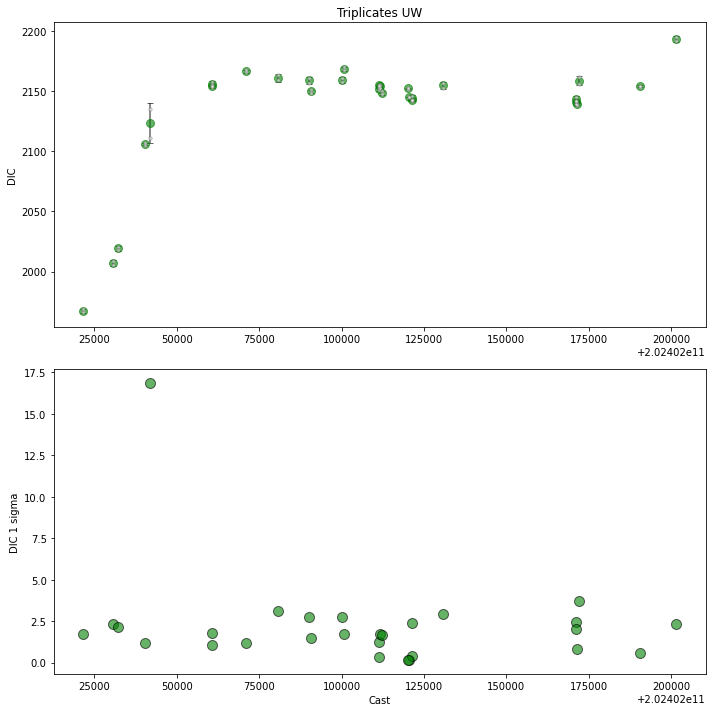

In [45]:
fig = plt.figure(figsize = (10, 10))
ax0 = fig.add_subplot(211)
ax1 = fig.add_subplot(212)

cond = (df_replicates_mean["DIC flag"] != 4) & (df_replicates_mean["Station"].isin([2222, 3333]))
ax0.errorbar(df_replicates_mean["Cast"].loc[cond], df_replicates_mean["dic_sample_umol_per_kg"].loc[cond], 
             yerr = df_replicates_std["dic_sample_umol_per_kg"].loc[cond],  
             fmt = "o", color = "green", ecolor = "k", alpha = 0.6, capsize = 3, ms = 8, zorder = 0)

cond = (df_replicates["DIC flag"] != 4) & (df_replicates["Station"].isin([2222, 3333]))
ax0.scatter(df_replicates["Cast"].loc[cond], df_replicates["dic_sample_umol_per_kg"].loc[cond], marker = "o", s = 10, c = "w", alpha = 0.6, edgecolor = "grey", zorder = 3)


cond = (df_replicates_std["DIC flag"] != 4) & (df_replicates_std["Station"].isin([2222, 3333]))
ax1.scatter(df_replicates_std["Cast"].loc[cond], df_replicates_std["dic_sample_umol_per_kg"].loc[cond], marker = "o", s = 100, c = "g", alpha = 0.6, edgecolor = "k")

ax0.set_ylabel("DIC")
ax1.set_ylabel("DIC 1 sigma")
ax1.set_xlabel("Cast")

ax0.set_title("Triplicates UW")
fig.tight_layout(); 



In [46]:
cond = (df_replicates_std["DIC flag"] != 4) & (df_replicates_std["Station"].isin([2222, 3333]))
df_replicates_std["dic_sample_umol_per_kg"].loc[cond].describe()

count    28.000000
mean      2.250874
std       3.005631
min       0.165023
25%       1.147918
50%       1.722894
75%       2.396080
max      16.839968
Name: dic_sample_umol_per_kg, dtype: float64

In [47]:
def assess_triplicates_uw_ta():
    fig = go.Figure()
    
    cond = (df_replicates_mean["TA flag"] != 4) & (df_replicates_mean["Station"].isin([2222, 3333]))
    fig.add_trace(go.Scatter(x=df_replicates_mean["Cast"].loc[cond], y=df_replicates_mean["alkalinity_umolkg"].loc[cond], 
                             mode='markers+text', 
                             text = df_replicates_mean["Depth (m)"].loc[cond], 
                             textposition = "bottom right", 
                             textfont = dict(size = 10), 
                             hovertext = df_replicates_mean["station_cast_niskin_depth"].loc[cond], 
                             marker=dict(color="green",size = 10), 
                             name='Mean'))
    
    cond = (df_replicates["TA flag"] != 4) & (df_replicates["Station"].isin([2222, 3333]))
    fig.add_trace(go.Scatter(x=df_replicates["Cast"].loc[cond], y=df_replicates["alkalinity_umolkg"].loc[cond], 
                             mode='markers+text', 
                             hovertext = df_replicates["station_cast_niskin_depth"].loc[cond], 
                             marker=dict(color='Blue'), 
                             name='Indiv'))
    
    
    cond = (df_replicates["TA flag"] == 4) & (df_replicates["Station"].isin([2222, 3333]))
    fig.add_trace(go.Scatter(x=df_replicates["Cast"].loc[cond], y=df_replicates["alkalinity_umolkg"].loc[cond], 
                             mode='markers+text', 
                             hovertext = df_replicates["station_cast_niskin_depth"].loc[cond], 
                             marker=dict(color='Red'), 
                             name='Indiv'))
    
    fig.update_layout(title='Assess TA triplicates for UW samples', xaxis_title='Cast', yaxis_title='TA')

    return fig

assess_triplicates_uw_ta()

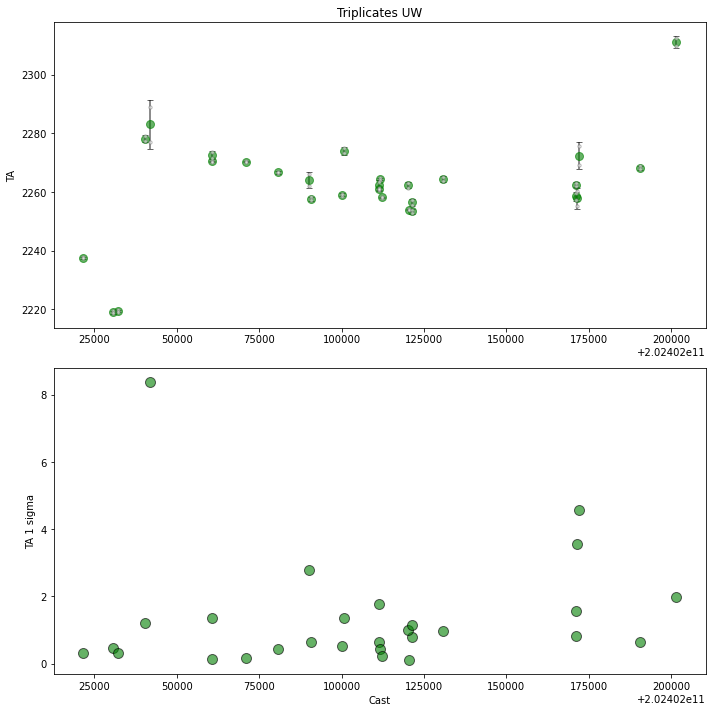

In [48]:
fig = plt.figure(figsize = (10, 10))
ax0 = fig.add_subplot(211)
ax1 = fig.add_subplot(212)

cond = (df_replicates_mean["TA flag"] != 4) & (df_replicates_mean["Station"].isin([2222, 3333]))
ax0.errorbar(df_replicates_mean["Cast"].loc[cond], df_replicates_mean["alkalinity_umolkg"].loc[cond], 
             yerr = df_replicates_std["alkalinity_umolkg"].loc[cond],  
             fmt = "o", color = "green", ecolor = "k", alpha = 0.6, capsize = 3, ms = 8, zorder = 0)

cond = (df_replicates["TA flag"] != 4) & (df_replicates["Station"].isin([2222, 3333]))
ax0.scatter(df_replicates["Cast"].loc[cond], df_replicates["alkalinity_umolkg"].loc[cond], marker = "o", s = 10, c = "w", alpha = 0.6, edgecolor = "grey", zorder = 3)


cond = (df_replicates_std["TA flag"] != 4) & (df_replicates_std["Station"].isin([2222, 3333]))
ax1.scatter(df_replicates_std["Cast"].loc[cond], df_replicates_std["alkalinity_umolkg"].loc[cond], marker = "o", s = 100, c = "g", alpha = 0.6, edgecolor = "k")

ax0.set_ylabel("TA")
ax1.set_ylabel("TA 1 sigma")
ax1.set_xlabel("Cast")

ax0.set_title("Triplicates UW")
fig.tight_layout(); 

In [49]:
cond = (df_replicates_std["TA flag"] != 4) & (df_replicates_std["Station"].isin([2222, 3333]))
df_replicates_std["alkalinity_umolkg"].loc[cond].describe()

count    28.000000
mean      1.370750
std       1.725854
min       0.110995
25%       0.435282
50%       0.807933
75%       1.415161
max       8.365961
Name: alkalinity_umolkg, dtype: float64

## Add columns in overall dataset with the means of duplicates and triplicates

In [50]:
df["station_cast_niskin_depth"] = df["Station"].astype(int).astype(str) + "_" + df["Cast"].astype(int).astype(str) + "_" + df["Niskin"].astype(int).astype(str) + "_" + df["Depth (m)"].astype(int).astype(str)

df_replicates_mean["dic_umolkg_sample_replicate_mean"] = df_replicates_mean["dic_sample_umol_per_kg"]
df_replicates_mean["dic_umolkg_sample_replicate_std"] = df_replicates_std["dic_sample_umol_per_kg"]

df_replicates_mean["ta_umolkg_sample_replicate_mean"] = df_replicates_mean["alkalinity_umolkg"]
df_replicates_mean["ta_umolkg_sample_replicate_std"] = df_replicates_std["alkalinity_umolkg"]


# df_merged = pd.merge(left = df, right = df_replicates_mean[["dic_umolkg_sample_replicate_mean", "dic_umolkg_sample_replicate_std", "station_cast_niskin_depth"]], on = "station_cast_niskin_depth", how = "left")
merge_these_columns = ["dic_umolkg_sample_replicate_mean", "dic_umolkg_sample_replicate_std", 
                       "ta_umolkg_sample_replicate_mean", "ta_umolkg_sample_replicate_std", 
                       "station_cast_niskin_depth"]
df_merged = df.merge(df_replicates_mean[merge_these_columns], on = "station_cast_niskin_depth", how = "left")




In [51]:
df_merged.loc[~df_merged["dic_umolkg_sample_replicate_mean"].isna()]
df_merged.loc[~df_merged["dic_umolkg_sample_replicate_std"].isna()]

df_merged.loc[~df_merged["ta_umolkg_sample_replicate_mean"].isna()]
df_merged.loc[~df_merged["ta_umolkg_sample_replicate_std"].isna()]


,Sample Name,Comments,DIC flag,TA flag,Analysis Type,Date (analysis),Time (analysis),Station,Cast,Niskin,...,pH_initial,temperature_initial,alkalinity_offset,vindta,cell_colours,station_cast_niskin_depth,dic_umolkg_sample_replicate_mean,dic_umolkg_sample_replicate_std,ta_umolkg_sample_replicate_mean,ta_umolkg_sample_replicate_std
8,0000_003_10_250_1_1,,2,2,3,2024-01-27,224708,0,3,10,...,7.659042,24.70,NaN,Lucy,firebrick,0_3_10_250,2245.566138,0.412968,2341.902335,1.737605
9,0000_003_10_250_2_1,,2,2,3,2024-01-27,231551,0,3,10,...,7.664713,24.64,NaN,Lucy,firebrick,0_3_10_250,2245.566138,0.412968,2341.902335,1.737605
10,0000_003_08_300_1_1,,2,2,3,2024-01-28,34442,0,3,8,...,7.668401,24.51,NaN,Lucy,firebrick,0_3_8_300,2247.180157,2.425710,2342.768588,0.060466
11,0000_003_08_300_2_1,,2,2,3,2024-01-28,41341,0,3,8,...,7.671212,24.43,NaN,Lucy,firebrick,0_3_8_300,2247.180157,2.425710,2342.768588,0.060466
12,0000_003_6_356_1_1,,2,2,3,2024-01-27,204508,0,3,6,...,7.664739,24.60,NaN,Lucy,firebrick,0_3_6_356,2248.415216,2.020502,2349.285871,1.594076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,3333_202402130816_1_7_2_1,,2,2,3,2024-02-16,5404,3333,202402130816,1,...,7.750889,24.19,NaN,Lucy,firebrick,3333_202402130816_1_7,2155.109779,2.908274,2264.322360,0.977861
398,3333_202402171111_1_7_1_1,,2,2,3,2024-02-21,113424,3333,202402171111,1,...,7.753508,24.90,NaN,Lucy,firebrick,3333_202402171111_1_7,2140.729006,2.038371,2262.488421,0.811448
399,3333_202402171111_1_7_2_1,,2,2,3,2024-02-21,121711,3333,202402171111,1,...,7.748305,24.92,NaN,Lucy,firebrick,3333_202402171111_1_7,2140.729006,2.038371,2262.488421,0.811448
400,3333_202402190436_1_7_1_1,,2,2,3,2024-02-21,102657,3333,202402190436,1,...,7.781985,23.74,NaN,Lucy,firebrick,3333_202402190436_1_7,2154.236026,0.591586,2268.230725,0.646953


,Sample Name,Comments,DIC flag,TA flag,Analysis Type,Date (analysis),Time (analysis),Station,Cast,Niskin,...,pH_initial,temperature_initial,alkalinity_offset,vindta,cell_colours,station_cast_niskin_depth,dic_umolkg_sample_replicate_mean,dic_umolkg_sample_replicate_std,ta_umolkg_sample_replicate_mean,ta_umolkg_sample_replicate_std
8,0000_003_10_250_1_1,,2,2,3,2024-01-27,224708,0,3,10,...,7.659042,24.70,NaN,Lucy,firebrick,0_3_10_250,2245.566138,0.412968,2341.902335,1.737605
9,0000_003_10_250_2_1,,2,2,3,2024-01-27,231551,0,3,10,...,7.664713,24.64,NaN,Lucy,firebrick,0_3_10_250,2245.566138,0.412968,2341.902335,1.737605
10,0000_003_08_300_1_1,,2,2,3,2024-01-28,34442,0,3,8,...,7.668401,24.51,NaN,Lucy,firebrick,0_3_8_300,2247.180157,2.425710,2342.768588,0.060466
11,0000_003_08_300_2_1,,2,2,3,2024-01-28,41341,0,3,8,...,7.671212,24.43,NaN,Lucy,firebrick,0_3_8_300,2247.180157,2.425710,2342.768588,0.060466
12,0000_003_6_356_1_1,,2,2,3,2024-01-27,204508,0,3,6,...,7.664739,24.60,NaN,Lucy,firebrick,0_3_6_356,2248.415216,2.020502,2349.285871,1.594076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,3333_202402130816_1_7_2_1,,2,2,3,2024-02-16,5404,3333,202402130816,1,...,7.750889,24.19,NaN,Lucy,firebrick,3333_202402130816_1_7,2155.109779,2.908274,2264.322360,0.977861
398,3333_202402171111_1_7_1_1,,2,2,3,2024-02-21,113424,3333,202402171111,1,...,7.753508,24.90,NaN,Lucy,firebrick,3333_202402171111_1_7,2140.729006,2.038371,2262.488421,0.811448
399,3333_202402171111_1_7_2_1,,2,2,3,2024-02-21,121711,3333,202402171111,1,...,7.748305,24.92,NaN,Lucy,firebrick,3333_202402171111_1_7,2140.729006,2.038371,2262.488421,0.811448
400,3333_202402190436_1_7_1_1,,2,2,3,2024-02-21,102657,3333,202402190436,1,...,7.781985,23.74,NaN,Lucy,firebrick,3333_202402190436_1_7,2154.236026,0.591586,2268.230725,0.646953


,Sample Name,Comments,DIC flag,TA flag,Analysis Type,Date (analysis),Time (analysis),Station,Cast,Niskin,...,pH_initial,temperature_initial,alkalinity_offset,vindta,cell_colours,station_cast_niskin_depth,dic_umolkg_sample_replicate_mean,dic_umolkg_sample_replicate_std,ta_umolkg_sample_replicate_mean,ta_umolkg_sample_replicate_std
8,0000_003_10_250_1_1,,2,2,3,2024-01-27,224708,0,3,10,...,7.659042,24.70,NaN,Lucy,firebrick,0_3_10_250,2245.566138,0.412968,2341.902335,1.737605
9,0000_003_10_250_2_1,,2,2,3,2024-01-27,231551,0,3,10,...,7.664713,24.64,NaN,Lucy,firebrick,0_3_10_250,2245.566138,0.412968,2341.902335,1.737605
10,0000_003_08_300_1_1,,2,2,3,2024-01-28,34442,0,3,8,...,7.668401,24.51,NaN,Lucy,firebrick,0_3_8_300,2247.180157,2.425710,2342.768588,0.060466
11,0000_003_08_300_2_1,,2,2,3,2024-01-28,41341,0,3,8,...,7.671212,24.43,NaN,Lucy,firebrick,0_3_8_300,2247.180157,2.425710,2342.768588,0.060466
12,0000_003_6_356_1_1,,2,2,3,2024-01-27,204508,0,3,6,...,7.664739,24.60,NaN,Lucy,firebrick,0_3_6_356,2248.415216,2.020502,2349.285871,1.594076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,3333_202402130816_1_7_2_1,,2,2,3,2024-02-16,5404,3333,202402130816,1,...,7.750889,24.19,NaN,Lucy,firebrick,3333_202402130816_1_7,2155.109779,2.908274,2264.322360,0.977861
398,3333_202402171111_1_7_1_1,,2,2,3,2024-02-21,113424,3333,202402171111,1,...,7.753508,24.90,NaN,Lucy,firebrick,3333_202402171111_1_7,2140.729006,2.038371,2262.488421,0.811448
399,3333_202402171111_1_7_2_1,,2,2,3,2024-02-21,121711,3333,202402171111,1,...,7.748305,24.92,NaN,Lucy,firebrick,3333_202402171111_1_7,2140.729006,2.038371,2262.488421,0.811448
400,3333_202402190436_1_7_1_1,,2,2,3,2024-02-21,102657,3333,202402190436,1,...,7.781985,23.74,NaN,Lucy,firebrick,3333_202402190436_1_7,2154.236026,0.591586,2268.230725,0.646953


,Sample Name,Comments,DIC flag,TA flag,Analysis Type,Date (analysis),Time (analysis),Station,Cast,Niskin,...,pH_initial,temperature_initial,alkalinity_offset,vindta,cell_colours,station_cast_niskin_depth,dic_umolkg_sample_replicate_mean,dic_umolkg_sample_replicate_std,ta_umolkg_sample_replicate_mean,ta_umolkg_sample_replicate_std
8,0000_003_10_250_1_1,,2,2,3,2024-01-27,224708,0,3,10,...,7.659042,24.70,NaN,Lucy,firebrick,0_3_10_250,2245.566138,0.412968,2341.902335,1.737605
9,0000_003_10_250_2_1,,2,2,3,2024-01-27,231551,0,3,10,...,7.664713,24.64,NaN,Lucy,firebrick,0_3_10_250,2245.566138,0.412968,2341.902335,1.737605
10,0000_003_08_300_1_1,,2,2,3,2024-01-28,34442,0,3,8,...,7.668401,24.51,NaN,Lucy,firebrick,0_3_8_300,2247.180157,2.425710,2342.768588,0.060466
11,0000_003_08_300_2_1,,2,2,3,2024-01-28,41341,0,3,8,...,7.671212,24.43,NaN,Lucy,firebrick,0_3_8_300,2247.180157,2.425710,2342.768588,0.060466
12,0000_003_6_356_1_1,,2,2,3,2024-01-27,204508,0,3,6,...,7.664739,24.60,NaN,Lucy,firebrick,0_3_6_356,2248.415216,2.020502,2349.285871,1.594076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,3333_202402130816_1_7_2_1,,2,2,3,2024-02-16,5404,3333,202402130816,1,...,7.750889,24.19,NaN,Lucy,firebrick,3333_202402130816_1_7,2155.109779,2.908274,2264.322360,0.977861
398,3333_202402171111_1_7_1_1,,2,2,3,2024-02-21,113424,3333,202402171111,1,...,7.753508,24.90,NaN,Lucy,firebrick,3333_202402171111_1_7,2140.729006,2.038371,2262.488421,0.811448
399,3333_202402171111_1_7_2_1,,2,2,3,2024-02-21,121711,3333,202402171111,1,...,7.748305,24.92,NaN,Lucy,firebrick,3333_202402171111_1_7,2140.729006,2.038371,2262.488421,0.811448
400,3333_202402190436_1_7_1_1,,2,2,3,2024-02-21,102657,3333,202402190436,1,...,7.781985,23.74,NaN,Lucy,firebrick,3333_202402190436_1_7,2154.236026,0.591586,2268.230725,0.646953


# Formatting

Drop the duplicate/triplicates

In [52]:
df_final = df_merged.drop_duplicates(subset = "station_cast_niskin_depth", keep = "first").reset_index(drop = True)

Create columns containing the final DIC and TA data

In [53]:
df_final[column_names.dic_sample_umol_per_kg_final] = df_final["dic_sample_umol_per_kg"].where(df_final["dic_umolkg_sample_replicate_mean"].isna(), df_final["dic_umolkg_sample_replicate_mean"]).round(1)

df_final[column_names.ta_sample_umol_per_kg_final] = df_final["alkalinity_umolkg"].where(df_final["ta_umolkg_sample_replicate_mean"].isna(), df_final["ta_umolkg_sample_replicate_mean"]).round(1)


***
# Save final data file

Save the final, fully quality checked data. 

Also save a version with selected columns, excluding the columns that are irrelevant for further data interpretation from this point onwards. 

In [56]:
savedir = "../output_data/Final_DICTA_data/"
savefile = "dicta_qc_final_"+datetime.date.today().strftime("%Y%m%d")+".csv"

df_final.to_csv(Path(savedir)/savefile, index = False) # save the full datafile

savefile = "dicta_qc_final_reduced_"+datetime.date.today().strftime("%Y%m%d")+".csv"
columns_to_save = ["Sample Name", "DIC flag", "TA flag", "Station", "Cast", "Niskin", "Replicate (diff bottle)", 
                   "Repeat(same bottle)", "No. Of Repeats", "Depth (m)", "CTD Temp (C)", "Salinity", 
                   "Phosphate (uMol/Kg)", "Silicate (uMol/Kg)", "Nitrate (uMol/Kg)", "DIC cell Number (sequential)", 
                   "Sample Bottle temp (C)", "salinity_availability", "ctd_temp_availability", 
                   "Pressure_CTD", "sampling_date", "Longitude", "Latitude", "analysis_datetime", 
                   "dic_sample_umol_per_kg_allcells", "dic_sample_umol_per_kg", "dic_driftcorr_flag", 
                   "dic_sample_umol_per_kg_driftcorr", "alkalinity_umolkg", 
                   "vindta", "station_cast_niskin_depth", "dic_umolkg_sample_replicate_mean", 
                   "dic_umolkg_sample_replicate_std", "ta_umolkg_sample_replicate_mean", "ta_umolkg_sample_replicate_std", 
                   "dic_sample_umol_per_kg_final", "ta_sample_umol_per_kg_final"]

df_final[columns_to_save].to_csv(Path(savedir)/savefile, index = False) # save a selection of the datafile



:)